In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


In [2]:
#importing data

df = pd.read_csv("/Users/aashishbharadwaj/Desktop/mlproject/notebook/data/stud.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#cleaning column names

df.columns = df.columns.str.replace(' ', '_')    
df.columns = df.columns.str.replace('/', '_')  
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [4]:
#creating dependent and independent features

X = df.drop(columns="math_score", axis=1)
y = df["math_score"]

In [5]:
#creating column transformer

num_features = X.select_dtypes(include='number').columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),
        ("OneHotEncode", oh_transformer, cat_features)
    ]
)

In [6]:
X = preprocessor.fit_transform(X)
X

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [7]:
X.shape

(1000, 19)

In [8]:
#train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((700, 19), (300, 19))

In [9]:
#creating function to evaluate model

def evaluate_model(true, predicted):
    
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square
   

In [10]:
#model training and model evaluation

models = {
    
    "Linear Regressor" : LinearRegression(),
    "Ridge Regressor" : Ridge(),
    "Lasso Regressor" : Lasso(),
    "Elastic Net Regressor" : ElasticNet(),
    "SVR" : SVR(),
    "KNN Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(),
    "XgBoost Regressor" : XGBRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluation
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("--------------------------------")
    
    print("Model performance training set")
    print(f"-MAE : {train_mae}")
    print(f"-MSE : {train_mse}")
    print(f"-RMSE : {train_rmse}")
    print(f"-r2 : {train_r2}")
    
    print('\n')
    
    print("Model performance test set")
    print(f"-MAE : {test_mae}")
    print(f"-MSE : {test_mse}")
    print(f"-RMSE : {test_rmse}")
    print(f"-r2 : {test_r2}")
    r2_list.append(test_r2)
    
    print('=' * 30)
    print('\n')


Linear Regressor
--------------------------------
Model performance training set
-MAE : 4.198519565142322
-MSE : 27.544689325007596
-RMSE : 5.248303471123559
-r2 : 0.8751313605993936


Model performance test set
-MAE : 4.418261320297307
-MSE : 30.886593188072972
-RMSE : 5.557570799195721
-r2 : 0.8758630443016738


Ridge Regressor
--------------------------------
Model performance training set
-MAE : 4.1976769609022035
-MSE : 27.548382173842256
-RMSE : 5.248655272909648
-r2 : 0.8751146197676473


Model performance test set
-MAE : 4.415505801902549
-MSE : 30.87571166904426
-RMSE : 5.556591731362334
-r2 : 0.8759067784434541


Lasso Regressor
--------------------------------
Model performance training set
-MAE : 5.158225799581063
-MSE : 42.387412072813156
-RMSE : 6.510561578912617
-r2 : 0.8078446842949261


Model performance test set
-MAE : 5.39290266556218
-MSE : 47.203967169943496
-RMSE : 6.87051433081567
-r2 : 0.8102815436561874


Elastic Net Regressor
--------------------------------
M

/Users/aashishbharadwaj/Desktop/Project/venv/lib/python3.8/site-packages/threadpoolctl.py:1195: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


Decision Tree Regressor
--------------------------------
Model performance training set
-MAE : 0.02142857142857143
-MSE : 0.08928571428571429
-RMSE : 0.2988071523335984
-r2 : 0.9995952401013053


Model performance test set
-MAE : 6.476666666666667
-MSE : 66.17
-RMSE : 8.1344944526381
-r2 : 0.7340547625780178


Random Forest Regressor
--------------------------------
Model performance training set
-MAE : 1.8557035714285712
-MSE : 5.4384198263888885
-RMSE : 2.332041986412099
-r2 : 0.9753459523105268


Model performance test set
-MAE : 4.838508333333333
-MSE : 37.67793701157408
-RMSE : 6.138235659501358
-r2 : 0.8485678116349772


AdaBoost Regressor
--------------------------------
Model performance training set
-MAE : 4.8115485969908915
-MSE : 34.669598639920956
-RMSE : 5.888089557736104
-r2 : 0.8428319317872413


Model performance test set
-MAE : 5.165619464875312
-MSE : 43.220333930069934
-RMSE : 6.574217362551221
-r2 : 0.8262922477181532


Learning rate set to 0.038699
0:	learn: 14.480

In [11]:
#displaying model and corresponding r2 score

result_df = pd.DataFrame(zip(model_list,r2_list), columns=["Model", "R2 Score"]).sort_values(by="R2 Score",ascending=False, ignore_index=True)
result_df

,Model,R2 Score
0,Ridge Regressor,0.875907
1,Linear Regressor,0.875863
2,CatBoost Regressor,0.852108
3,Random Forest Regressor,0.848568
4,AdaBoost Regressor,0.826292
5,XgBoost Regressor,0.811029
6,Lasso Regressor,0.810282
7,KNN Regressor,0.771733
8,Elastic Net Regressor,0.736961
9,Decision Tree Regressor,0.734055


In [12]:
#Choosing Linear Regressor

lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)
accuracy = score*100
print(f"Accuracy of the model is {accuracy}")


Accuracy of the model is 87.58630443016739


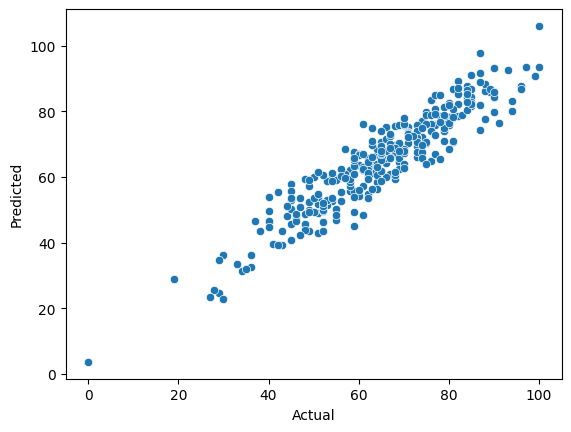

In [24]:
#plotting y_pred and y_test

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Text(0, 0.5, 'Predicted')

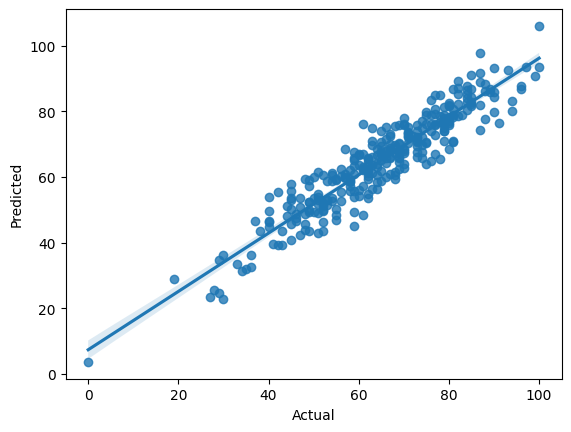

In [25]:
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [31]:
#Difference between actual and predicted values

pd.DataFrame(zip(y_test, y_pred, y_test-y_pred), columns=["Actual", "Predicted","Difference"])

,Actual,Predicted,Difference
0,91,76.511652,14.488348
1,53,58.898180,-5.898180
2,80,76.938478,3.061522
3,74,76.965881,-2.965881
4,84,87.633152,-3.633152
...,...,...,...
295,77,72.854766,4.145234
296,70,62.606548,7.393452
297,65,58.650347,6.349653
298,40,44.841375,-4.841375
